### Assignment 3: Python for Analytics, Summer

* covers lectures 7-9
* due: August 17th by 5pm.
* Points will be deducted if:
    * Problems are not completed.
    * Portions of problems are not completed.
    * Third party modules where used when the question specified not to do so.
    * The problem was solved in a very inefficient manner.  For instance, copying and pasting the same block of code 10 times instead of using a for loop or using a for loop when a comprehension would work.

#### Question 1 (10 points)

Run the count vectorizer on the below and use the matrix to create a Kmeans clustering model.

Print the feature matrix and the cluster assignments.

In [64]:
corpus = [
    'This is the first document.', 
    'This document is the second document.',
    'And this is the third one.', 
    'Is this the first document?',
]

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.cluster import KMeans
vectorizer = CountVectorizer()
cvect_data = vectorizer.fit_transform(corpus)
cvect_df = pd.DataFrame(cvect_data.toarray(), columns = vectorizer.get_feature_names())
print("The feature matrix :\n")
print(cvect_df,"\n\n\n")
kmeans = KMeans(3).fit(cvect_df)
print("Cluster assignments :\n")
for i in zip(corpus, kmeans.labels_):
    print(i)

The feature matrix :

   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1 



Cluster assignments :

('This is the first document.', 0)
('This document is the second document.', 2)
('And this is the third one.', 1)
('Is this the first document?', 0)


#### Question 2 (10 points)

Make a UDF that takes a matrix of data and normalizes the data using either StandardScaler, MinMax or scale.  Include a param called "how"  that indicates which type or normalization to perform.  Use an assert to check that the "how" param is one of the 3 options (minmax, standardscaler, mean centering).

Test this using the Iris data for one of the normalization types.  Print the describe of the resulting dataframe.

In [95]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris["data"]
iris_labels = iris["target_names"]
iris_features = iris["feature_names"]
iris_df = pd.DataFrame(iris_data, columns =iris_features)


In [122]:
def norm_func(matrix,**kwargs):
    assert  "minmax" in kwargs.get("how") or "standardscaler" in kwargs.get("how") or "mean_centering" in kwargs.get("how"), "The 'how' parameter needs to be one of these : minmax,standardscaler or mean_centering" 
    if kwargs.get("how") == "minmax":
            min_max_df = (matrix - matrix.min())/(matrix.max() - matrix.min())
            print("Min-Max scale of the matrix :\n\n {}".format(min_max_df))
    elif kwargs.get("how") == "standardscaler":
            standard_scalar_df = (matrix - matrix.mean())/matrix.std()
            print("standard scale of the matrix :\n\n {}".format(standard_scalar_df))
    elif kwargs.get("how") == "mean_centering":
            mean_centered_df = matrix - matrix.mean()
            print("mean centered scale of the matrix : \n\n{}".format(mean_centered_df))
        
        
norm_func(iris_df,how="standardscaler")


standard scale of the matrix :

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.897674          1.015602          -1.335752         -1.311052
1            -1.139200         -0.131539          -1.335752         -1.311052
2            -1.380727          0.327318          -1.392399         -1.311052
3            -1.501490          0.097889          -1.279104         -1.311052
4            -1.018437          1.245030          -1.335752         -1.311052
..                 ...               ...                ...               ...
145           1.034539         -0.131539           0.816859          1.443994
146           0.551486         -1.278680           0.703564          0.919223
147           0.793012         -0.131539           0.816859          1.050416
148           0.430722          0.786174           0.930154          1.443994
149           0.068433         -0.131539           0.760211          0.788031

[150 rows x 4 columns]


In [125]:
norm_func(iris_df,how="mean_centering")

mean centered scale of the matrix : 

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 rows x 4 columns]


In [126]:
norm_func(iris_df,how="minmax")

Min-Max scale of the matrix :

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]


#### Question 3 (10 points)

Make a train test split on the Boston Housing dataset.  Run a regression.  Plot the y and yhat as a scatter plot.  Record the train and test MSE and RMSE.

Print the MSE and RMSE for the train and test.

Scatterplot between Y_Actual and Y_Predicted for the TRAIN data
Scatterplot between Y_Actual and Y_Predicted for the TEST data


Train MSE:21.641 	: 	Train RMSE:4.652


Test MSE:17.193 	: 	Test RMSE:4.146


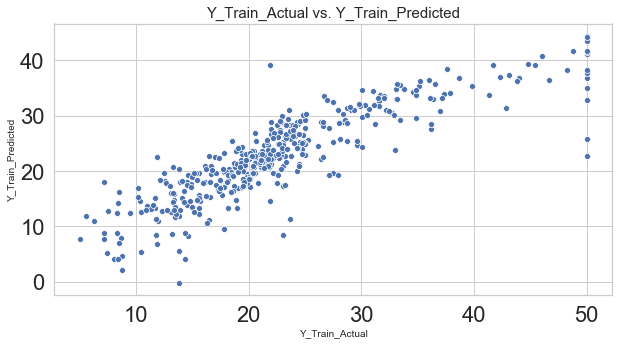

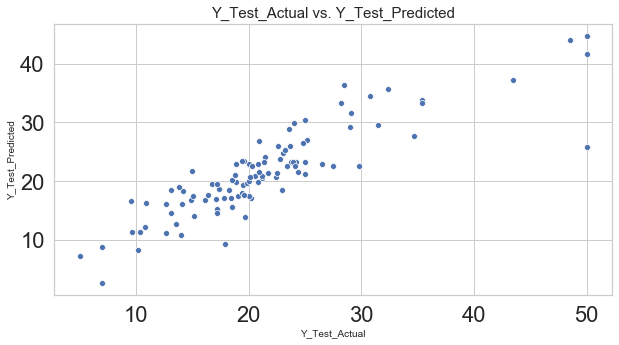

In [71]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

boston_data = load_boston()
boston_columns = boston_data.feature_names
x_boston = pd.DataFrame(boston_data.data, columns = boston_columns)
y_boston = boston_data["target"]
x_train, x_test, y_train, y_test = train_test_split(x_boston, y_boston, test_size=0.2, random_state=42)

lr_train = LinearRegression()
lr_test = LinearRegression()
lr_train.fit(x_train, y_train)
lr_test.fit(x_test, y_test)
boston_y_train_hat = lr_train.predict(x_train)
boston_y_test_hat = lr_test.predict(x_test)

boston_y_test = y_test

predict_train_df = pd.DataFrame(boston_y_train_hat, columns = ["Y_Train_Predicted"])
predict_train_df["Y_Train_Actual"] = y_train

predict_test_df = pd.DataFrame(boston_y_test_hat, columns = ["Y_Test_Predicted"])

predict_test_df["Y_Test_Actual"] = y_test


print("Scatterplot between Y_Actual and Y_Predicted for the TRAIN data")
plt.figure(figsize=(10,5))
ax = sns.scatterplot(predict_train_df["Y_Train_Actual"],predict_train_df["Y_Train_Predicted"] )
ax.set_xlabel("Y_Train_Actual", fontsize = 10)
ax.set_ylabel("Y_Train_Predicted", fontsize = 10)
ax.set_title("Y_Train_Actual vs. Y_Train_Predicted", fontsize = 15)



print("Scatterplot between Y_Actual and Y_Predicted for the TEST data")
plt.figure(figsize=(10,5))
ay = sns.scatterplot(predict_test_df["Y_Test_Actual"],predict_test_df["Y_Test_Predicted"] )
ay.set_xlabel("Y_Test_Actual", fontsize = 10)
ay.set_ylabel("Y_Test_Predicted", fontsize = 10)
ay.set_title("Y_Test_Actual vs. Y_Test_Predicted", fontsize = 15)

MSE_train = mean_squared_error(y_train, boston_y_train_hat)
RMSE_train = np.sqrt(MSE_train)

MSE_test = mean_squared_error(y_test, boston_y_test_hat)
RMSE_test = np.sqrt(MSE_test)

print("\n\nTrain MSE:{} \t: \tTrain RMSE:{}\n\n".format(round(MSE_train,3), round(RMSE_train,3)))
print("Test MSE:{} \t: \tTest RMSE:{}".format(round(MSE_test,3), round(RMSE_test,3)))


#### Question 4 (15 points)

Run a Grid Search on a decision tree using the Iris dataset.  Pick 3 params and have 2 values for each param.  Use  3 fold cross validation.  Plot the validation metrics returned from gridsearch (how the model performed) as a bar graph.

Print the validation metrics and the best params out, along with the bar graph.

Fitting 3 folds for each of 11232 candidates, totalling 33696 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 365 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 18887 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 33696 out of 33696 | elapsed:   32.9s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'max_leaf_nodes')

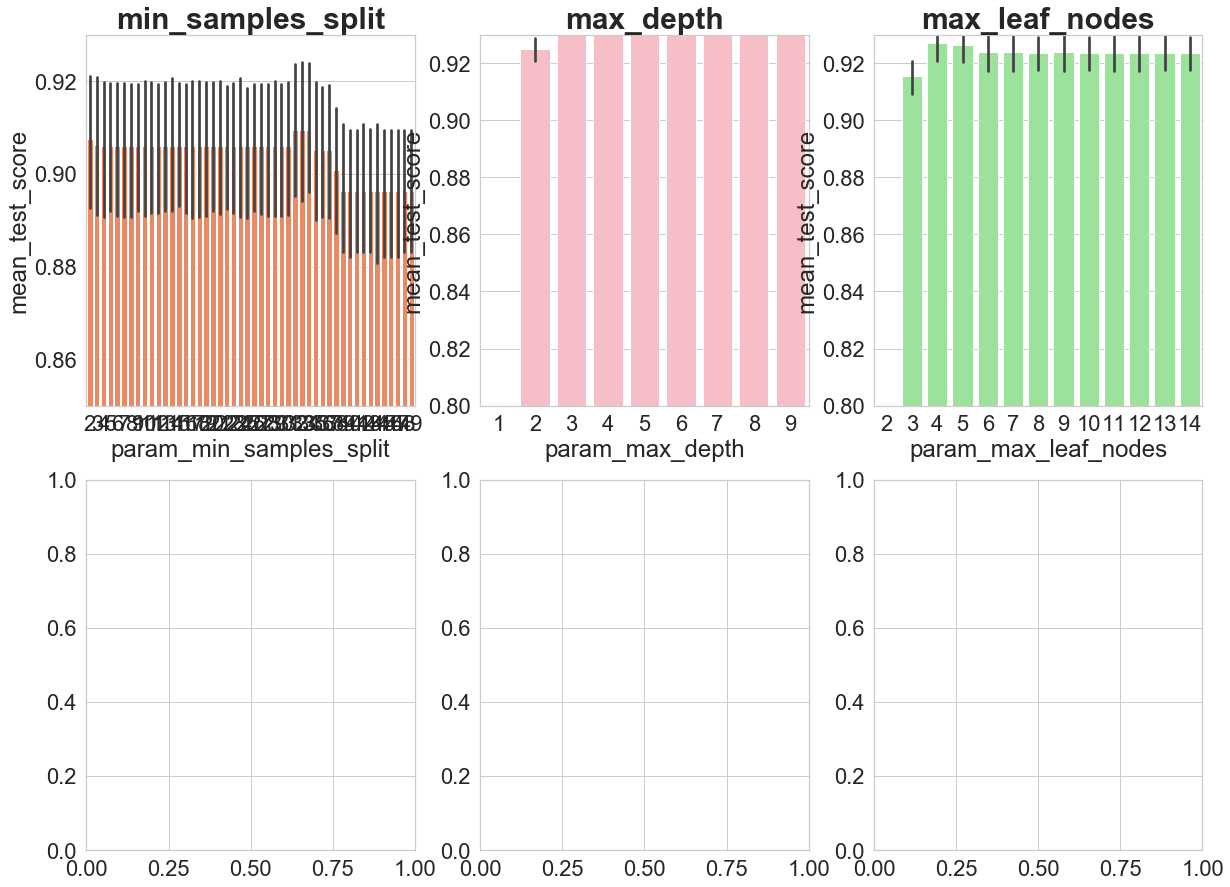

In [72]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
data = iris["data"]
labels = iris["target_names"]
feature_columns = iris["feature_names"]

df = pd.DataFrame(data, columns = feature_columns)
df["label"] = np.array([labels[x] for x in iris["target"]])

x = df.drop("label", 1)
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()

param_map = {
    'criterion':('gini', 'entropy'), 
    "max_depth":list(range(1, 10)),
    "min_samples_split":list(range(2,50,1)),
    "max_leaf_nodes":list(range(2, 15))
}

gs = GridSearchCV(clf, param_map,scoring='accuracy', cv=3, verbose = 1, n_jobs =4)
gs.fit(x,y)


val_metrics_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
val_metrics_df = val_metrics_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)



fig, axes = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(20,15)

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=val_metrics_df, ax=axes[0,0], color='coral')
axes[0,0].set_ylim([.85,.93])
axes[0,0].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=val_metrics_df, ax=axes[0,1], color='lightpink')
axes[0,1].set_ylim([.80,.93])
axes[0,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_max_leaf_nodes', y='mean_test_score', data=val_metrics_df, ax=axes[0,2], color='lightgreen')
axes[0,2].set_ylim([.80,.93])
axes[0,2].set_title(label = 'max_leaf_nodes', size=30, weight='bold')

In [73]:
val_metrics_df.head(100)

,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_split,mean_test_score,rank_test_score
0,gini,6,8,33,0.966667,1
1,gini,7,14,32,0.966667,1
2,gini,7,14,33,0.966667,1
3,gini,7,14,34,0.966667,1
4,gini,3,14,34,0.966667,1
...,...,...,...,...,...,...
95,gini,3,12,32,0.966667,1
96,entropy,5,12,34,0.966667,1
97,entropy,5,12,33,0.966667,1
98,entropy,5,12,32,0.966667,1


In [74]:
gs.best_params_


{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_split': 2}

In [75]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
gs.cv_results_

{'mean_fit_time': array([0.00272894, 0.00251428, 0.0018127 , ..., 0.00242019, 0.0017813 ,
        0.00239547]),
 'std_fit_time': array([2.27844683e-05, 1.69032140e-04, 2.73965045e-04, ...,
        9.00039262e-04, 4.51400246e-05, 2.19962758e-04]),
 'mean_score_time': array([0.00128643, 0.00100907, 0.00089073, ..., 0.00092808, 0.00121029,
        0.00097259]),
 'std_score_time': array([1.00279760e-04, 2.92868692e-04, 1.53081810e-04, ...,
        1.33802655e-05, 3.11322347e-04, 1.74250475e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_leaf_nodes': masked_array(data=[2, 2, 2, ..., 14, 14, 14],
      

In [77]:
gs.best_score_

0.9666666666666667

#### Quesiton 5 (15 points)

Make a generator that parses the list of transaction data.
* Put the contents in a dictionary where the key is the user id and the value is the list of items the user has purchased
* Note the transactions are pipe ( | ) delimtied, meaning you'll have to use some string manipulations to get the values from each transaction,  such a split("|"), which will split the string on the pipe and return a list.
* Make sure to skip the header somehow and to iterate the generator, not the list.

Print the dictionary out.

In [78]:
transactions = [
    ["user_id|item_id"],
    ["A|item_a"],
    ["B|item_a"],
    ["C|item_a"],
    ["C|item_b"],
    ["C|item_c"],
    ["B|item_c"],
    ["D|item_b"],
    ["D|item_b"]
]

In [79]:
dictionary = {}
generator = (i[0] for idx,i in enumerate(transactions) if idx != 0)
generator = [i.split("|") for i in generator]


for i in generator:
    if i[0] in dictionary:
        dictionary[i[0]].append(i[1])
    else:
        dictionary[i[0]] = [i[1]]
        
dictionary


{'A': ['item_a'],
 'B': ['item_a', 'item_c'],
 'C': ['item_a', 'item_b', 'item_c'],
 'D': ['item_b', 'item_b']}

#### Question 6 (20 points)

The below snippets  of code will scrape the paragraph content from the below Wikepedia url.

In [25]:
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import io
url = "https://en.wikipedia.org/wiki/Illinois"

In [26]:
mybytes = urllib.request.urlopen(url)
mybytes = mybytes.read().decode("utf8")

parsed_html = BeautifulSoup(mybytes, features="lxml")

In [27]:
paragraph_data = [i.text for i in parsed_html.find_all("p")]
paragraph_data = " ".join(paragraph_data).strip()
paragraph_data[0:500]

'Illinois (/ˌɪləˈnɔɪ/ (listen) IL-ə-NOY) is a state in the Midwestern and Great Lakes regions of the United States. It has the fifth largest gross domestic product (GDP),\nthe sixth largest population, and the 25th largest land area of all U.S. states. Illinois has been noted as a microcosm of the entire United States.[7] With Chicago in northeastern Illinois, small industrial cities and immense agricultural productivity in the north and center of the state, and natural resources such as coal, tim'

Create a udf that returns the pargraph data from a given Wikipedia url.  Map the udf to a list of 5 wiki (your choice of which wikis, though I'm sad to say Brian Craft doesn't have his own wiki) urls using a thread pool executor.  Have the function return a tuple where the first element is the url and the second element is the paragraph data.

For one of the wikis, print out the first 500 characters of the paragraph data.

In [80]:
import urllib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import io
from concurrent.futures import ThreadPoolExecutor
wikis = [
    "https://en.wikipedia.org/wiki/Donald_Trump",
    "https://en.wikipedia.org/wiki/Cristiano_Ronaldo",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://en.wikipedia.org/wiki/Google_Brain",
    "https://en.wikipedia.org/wiki/University_of_Chicago"
]

def web_scraper_func(x):
    mybytes = urllib.request.urlopen(x)
    mybytes = mybytes.read().decode("utf8")
    parsed_html = BeautifulSoup(mybytes, features="lxml")
    paragraph_data = [i.text for i in parsed_html.find_all("p")]
    paragraph_data = " ".join(paragraph_data).strip()
    return(x,paragraph_data[0:500])
   
   

with ThreadPoolExecutor(5) as executor:
    results =  executor.map(web_scraper_func,wikis)
results = list(results)
results

[('https://en.wikipedia.org/wiki/Donald_Trump',
  "Donald John Trump (born June 14, 1946) is the 45th and current president of the United States. Before entering politics, he was a businessman and television personality.\n Trump was born and raised in Queens, a borough of New York City, attended Fordham University for two years and received a bachelor's degree in economics from the Wharton School of the University of Pennsylvania. He became president of his father's real-estate business in 1971, renamed it The Trump Organization, and expanded its"),
 ('https://en.wikipedia.org/wiki/Cristiano_Ronaldo',
  "Portuguese professional footballer\n Eponyms\n Films\n Cristiano Ronaldo dos Santos Aveiro GOIH ComM (European Portuguese:\xa0[kɾiʃˈtjɐnu ʁɔˈnaɫdu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for Serie A club Juventus and captains the Portugal national team. Often considered the best player in the world and  widely regarded as one of the greate

#### Question 7 (20 points)

Find all the possible combinations of the below user lists.  To the resulting list of tuples, use multiprocessing to map a function that finds the distances of each combination.  Put the results in a Pandas dataframe and find the 2 most similar users.  Do not include comparisons against a user to themselves.  Remove these from the list of tuples prior to mapping the function.

Print out the top 5 rows of the dataframe, sorting from closest to least similar.

In [81]:
import pandas as pd
import numpy as np
from itertools import permutations, combinations
from scipy.spatial.distance import pdist, squareform
from concurrent.futures import ThreadPoolExecutor
import multiprocessing as mp
users = ["a", "b", "c", "d"]
global vectors
global ratings
vectors = {
    "a": [1,2,2,1],
    "b": [2,4,2,1],
    "c": [5,4,2,4],
    "d": [5,3,2,1]
}
ratings = {k:np.array(v) for k, v in vectors.items()}
combos = list(combinations(vectors.keys(), 2))
combos
def pairwise_cal(item):
    x = ratings[item[0]]
    y = ratings[item[1]]
    euc_dist = np.sqrt(sum((x-y)**2))
    return (item[0],item[1],euc_dist)

pool = mp.Pool(4)
results = pool.map(pairwise_cal, combos)
df_results = pd.DataFrame(results,columns = ["user","most_similar_user","similarity_distance"])
top_df = df_results.nlargest(5,'similarity_distance')
top_df

,user,most_similar_user,similarity_distance
1,a,c,5.385165
3,b,c,4.242641
2,a,d,4.123106
4,b,d,3.162278
5,c,d,3.162278
